<a href="https://colab.research.google.com/github/danlamberg/DS_AprendizadoMaquina/blob/main/AtividadeAvaliativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ALUNO: DANIEL DE OLIVEIRA LAMBERG

ALUNO: DIOGO VARONI DE MOURA

RM: 12210919

RM: 13135759

TURMA: Data Science - Osório Sala 404 - QUA - 19:00 - 21:40

Os dados foram extraídos do site do Kaggle:
[Desempenho dos alunos nos exames](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?select=exams.csv)

ATRIBUTOS DO DATAFRAME

Sobre o conjunto de dados
Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas.

Exemplos de perguntas de pesquisa:

Quão eficaz é o curso de preparação para o teste?

Quais os principais fatores que contribuem para os resultados dos testes?

Qual seria a melhor maneira de melhorar as notas dos alunos em cada teste?

Que padrões e interações nos dados você pode encontrar?


### **COLUNAS**

Gender: Gênero

Race/Ethnicity: Raça/Etnia

Parental Level: Escolaridade, nível dos pais

Lunch: Almoço

Test Preparation: Preparação do Teste

Math Score: Pontuação de Matemática

Reading Score: Pontuação de Leitura

Writing Score: Pontuação de Escrita

Importando Pandas e bibliotecas:

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=FutureWarning)


sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/BSI/DATA SCIENCE/Colab Notebooks/AtividadeSegundoBimestre/exams.csv',
                    sep=',', encoding='utf-8')

Visualizando o que está no Data Frame, visualização das primeiras linhas:

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Método de rotação do Data Frame:

In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
gender,male,female,male,male,male,female,female,male,male,male,...,male,female,male,female,male,male,male,female,female,male
race/ethnicity,group A,group D,group E,group B,group E,group D,group A,group E,group D,group C,...,group D,group C,group C,group A,group E,group C,group D,group C,group C,group A
parental level of education,high school,some high school,some college,high school,associate's degree,high school,bachelor's degree,some college,high school,some college,...,some college,associate's degree,some college,associate's degree,high school,high school,associate's degree,some high school,some college,some college
lunch,standard,free/reduced,free/reduced,standard,standard,standard,standard,standard,standard,free/reduced,...,standard,standard,standard,standard,free/reduced,standard,free/reduced,free/reduced,standard,standard
test preparation course,completed,none,none,none,completed,none,none,completed,none,none,...,none,none,none,none,completed,none,completed,none,none,completed
math score,67,40,59,77,78,63,62,93,63,47,...,67,87,69,58,86,73,85,32,73,65
reading score,67,59,60,78,73,77,59,88,56,42,...,55,93,63,54,82,70,91,35,74,60
writing score,63,55,50,68,68,76,63,84,65,45,...,53,88,66,58,75,65,92,41,82,62


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Valores Missing (NAN):

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Análise dos tipos de atributos:

In [15]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Renomeando colunas 

In [16]:
df.rename(columns={'gender': 'genero'}, inplace=True)
df.rename(columns={'race/ethnicity': 'raca'}, inplace=True)
df.rename(columns={'parental level of education': 'escolaridade_dos_pais'}, inplace=True)
df.rename(columns={'test preparation course': 'preparacao_para_teste'}, inplace=True)
df.rename(columns={'math score': 'pontuacao_matematica'}, inplace=True)
df.rename(columns={'reading score': 'pontuacao_leitura'}, inplace=True)
df.rename(columns={'writing score': 'pontuacao_escrita'}, inplace=True)
df.drop(columns={'escolaridade_dos_pais'}, inplace=True)
df.drop(columns={'preparacao_para_teste'}, inplace=True)
df.drop(columns={'lunch'}, inplace=True)

In [17]:
df.head()

,genero,raca,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,67,67,63
1,female,group D,40,59,55
2,male,group E,59,60,50
3,male,group B,77,78,68
4,male,group E,78,73,68


Visualização gráfica com Plotly

In [18]:
import plotly.express as px

In [19]:
hist =  px.histogram (df,  x = "raca", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das raças') 
hist.show()

Visualização gráfica com Seaborn

In [20]:
import seaborn as sns

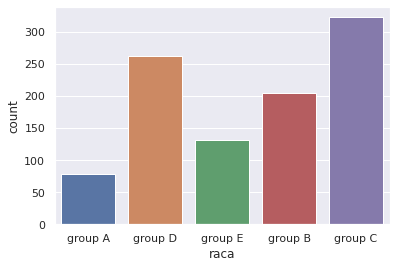

In [22]:
sns.countplot(x='raca', data=df);

In [23]:
df.shape

(1000, 5)

Dados Estatísticos

In [25]:
df.describe()

,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Análise dos outliers

In [26]:
import plotly.express as px

In [27]:
boxplot = px.box(df, y="pontuacao_matematica")
boxplot.show()

In [28]:
boxplot = px.box(df, y="pontuacao_leitura")
boxplot.show()

In [29]:
boxplot = px.box(df, y="pontuacao_escrita")
boxplot.show()

## PRÉ-PROCESSAMENTO

In [30]:
df.head(12)

,genero,raca,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,67,67,63
1,female,group D,40,59,55
2,male,group E,59,60,50
3,male,group B,77,78,68
4,male,group E,78,73,68
5,female,group D,63,77,76
6,female,group A,62,59,63
7,male,group E,93,88,84
8,male,group D,63,56,65
9,male,group C,47,42,45


Transformando variáveis categóricas em numéricas

In [32]:
df['genero'].replace({'male': 0, 'female': 1}, inplace=True)


In [33]:
df.head(10)

,genero,raca,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,0,group A,67,67,63
1,1,group D,40,59,55
2,0,group E,59,60,50
3,0,group B,77,78,68
4,0,group E,78,73,68
5,1,group D,63,77,76
6,1,group A,62,59,63
7,0,group E,93,88,84
8,0,group D,63,56,65
9,0,group C,47,42,45


### Criação de variáveis Dummy: OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['raca']])

In [39]:
oneHotEncoder.todense()

matrix([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [40]:
oneHotEncoder.shape

(1000, 5)

In [41]:
nome_colunas = encoder.get_feature_names(['raca'])
df_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df_encoder

,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,0.0,0.0


In [44]:
df = pd.concat([df, df_encoder], axis=1).drop(['raca'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genero                1000 non-null   int64  
 1   pontuacao_matematica  1000 non-null   int64  
 2   pontuacao_leitura     1000 non-null   int64  
 3   pontuacao_escrita     1000 non-null   int64  
 4   raca_group A          1000 non-null   float64
 5   raca_group B          1000 non-null   float64
 6   raca_group C          1000 non-null   float64
 7   raca_group D          1000 non-null   float64
 8   raca_group E          1000 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 70.4 KB


Escalonando

In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)

In [49]:
df_esc


array([[-0.96655883,  0.03923309, -0.13591401, ..., -0.69072779,
        -0.59583014, -0.38826278],
       [ 1.03459817, -1.714564  , -0.67902695, ..., -0.69072779,
         1.67833069, -0.38826278],
       [-0.96655883, -0.48041049, -0.61113783, ..., -0.69072779,
        -0.59583014,  2.57557523],
       ...,
       [ 1.03459817, -2.23420758, -2.30836575, ...,  1.44774833,
        -0.59583014, -0.38826278],
       [ 1.03459817,  0.42896578,  0.33930981, ...,  1.44774833,
        -0.59583014, -0.38826278],
       [-0.96655883, -0.0906778 , -0.61113783, ..., -0.69072779,
        -0.59583014, -0.38826278]])

K-MEANS COM DOIS ATRIBUTOS

In [51]:
df

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E
0,0,67,67,63,1.0,0.0,0.0,0.0,0.0
1,1,40,59,55,0.0,0.0,0.0,1.0,0.0
2,0,59,60,50,0.0,0.0,0.0,0.0,1.0
3,0,77,78,68,0.0,1.0,0.0,0.0,0.0
4,0,78,73,68,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,0,73,70,65,0.0,0.0,1.0,0.0,0.0
996,0,85,91,92,0.0,0.0,0.0,1.0,0.0
997,1,32,35,41,0.0,0.0,1.0,0.0,0.0
998,1,73,74,82,0.0,0.0,1.0,0.0,0.0


In [52]:
dados = df.iloc[:, [2,3]].values

In [53]:
dados

array([[67, 63],
       [59, 55],
       [60, 50],
       ...,
       [35, 41],
       [74, 82],
       [60, 62]])

**Utilizando o método Elbow Method**

In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

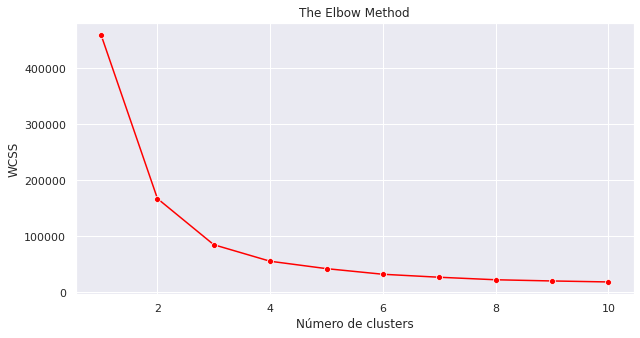

In [55]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

AGRUPAMENTO

In [56]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [57]:
kmeans1 = kmeans.fit(dados)

In [58]:
centroides = kmeans1.cluster_centers_
centroides

array([[45.92592593, 43.51851852],
       [62.50909091, 60.79393939],
       [89.07853403, 89.4921466 ],
       [75.45741325, 74.23659306]])

In [59]:
valor = kmeans1.labels_
valor

array([1, 1, 1, 3, 3, 3, 1, 2, 1, 0, 2, 2, 2, 3, 2, 1, 0, 1, 0, 0, 2, 1,
       3, 1, 0, 0, 1, 1, 2, 0, 3, 3, 0, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3,
       2, 0, 1, 3, 3, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 3, 2, 3,
       1, 0, 1, 1, 3, 0, 1, 3, 3, 3, 1, 2, 3, 0, 1, 0, 1, 3, 0, 3, 3, 2,
       1, 3, 0, 3, 2, 2, 3, 1, 2, 0, 0, 1, 1, 3, 3, 1, 1, 3, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 3, 1, 1, 1, 2, 3, 2, 1, 0, 2, 1, 1, 0, 2, 2, 3, 1,
       1, 1, 1, 3, 3, 1, 0, 1, 1, 3, 2, 1, 3, 1, 1, 0, 2, 0, 3, 1, 3, 3,
       1, 0, 1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 1, 1, 2, 2, 1, 3, 3, 1, 3, 1,
       1, 0, 2, 2, 1, 0, 2, 3, 2, 2, 3, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 3, 3, 3, 2, 1, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1,
       2, 3, 0, 3, 2, 3, 0, 3, 3, 2, 2, 3, 0, 3, 3, 2, 1, 2, 1, 3, 2, 3,
       1, 1, 0, 3, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 2, 1, 0, 0, 1,
       2, 1, 3, 3, 1, 3, 3, 3, 1, 2, 2, 3, 3, 3, 0, 3, 3, 2, 1, 0, 0, 3,
       2, 0, 3, 1, 3, 3, 3, 3, 1, 2, 0, 1, 1, 0, 0,

In [60]:
dados[3,:]

array([78, 68])

In [61]:
valor[3]

3

In [62]:
import plotly.express as px
import plotly.graph_objects as go

In [63]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=valor)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Valor')
graf3.show()

In [64]:
agrupamento = pd.DataFrame(valor, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,3
4,3
...,...
995,1
996,2
997,0
998,3


In [65]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
0,0,67,67,63,1.0,0.0,0.0,0.0,0.0,1
1,1,40,59,55,0.0,0.0,0.0,1.0,0.0,1
2,0,59,60,50,0.0,0.0,0.0,0.0,1.0,1
3,0,77,78,68,0.0,1.0,0.0,0.0,0.0,3
4,0,78,73,68,0.0,0.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
995,0,73,70,65,0.0,0.0,1.0,0.0,0.0,1
996,0,85,91,92,0.0,0.0,0.0,1.0,0.0,2
997,1,32,35,41,0.0,0.0,1.0,0.0,0.0,0
998,1,73,74,82,0.0,0.0,1.0,0.0,0.0,3


In [66]:
df3.iloc[150 , :]

genero                   1.0
pontuacao_matematica    67.0
pontuacao_leitura       78.0
pontuacao_escrita       80.0
raca_group A             0.0
raca_group B             0.0
raca_group C             1.0
raca_group D             0.0
raca_group E             0.0
Grupo                    3.0
Name: 150, dtype: float64

In [71]:
df3.loc[df3.pontuacao_matematica > 92] 

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
7,0,93,88,84,0.0,0.0,0.0,0.0,1.0,2
10,0,99,83,85,0.0,0.0,0.0,0.0,1.0,2
39,0,98,81,77,0.0,0.0,0.0,0.0,1.0,3
44,0,100,88,87,0.0,0.0,0.0,0.0,1.0,2
87,0,97,93,88,0.0,0.0,0.0,1.0,0.0,2
93,0,94,87,93,0.0,0.0,0.0,1.0,0.0,2
96,1,95,100,100,0.0,0.0,0.0,0.0,1.0,2
128,0,100,84,87,0.0,0.0,0.0,0.0,1.0,2
148,1,100,100,100,0.0,0.0,0.0,0.0,1.0,2
211,0,97,88,85,0.0,0.0,0.0,1.0,0.0,2


In [72]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
9,0,47,42,45,0.0,0.0,1.0,0.0,0.0,0
16,0,58,47,42,0.0,1.0,0.0,0.0,0.0,0
18,1,23,44,44,0.0,0.0,1.0,0.0,0.0,0
19,0,39,32,31,0.0,0.0,1.0,0.0,0.0,0
24,0,46,38,32,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
978,0,51,51,45,0.0,0.0,1.0,0.0,0.0,0
980,1,39,50,49,0.0,0.0,1.0,0.0,0.0,0
981,0,64,48,48,0.0,0.0,1.0,0.0,0.0,0
983,0,58,50,47,1.0,0.0,0.0,0.0,0.0,0


In [73]:
grupo0.shape

(162, 10)

In [74]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
0,0,67,67,63,1.0,0.0,0.0,0.0,0.0,1
1,1,40,59,55,0.0,0.0,0.0,1.0,0.0,1
2,0,59,60,50,0.0,0.0,0.0,0.0,1.0,1
6,1,62,59,63,1.0,0.0,0.0,0.0,0.0,1
8,0,63,56,65,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
990,0,67,55,53,0.0,0.0,0.0,1.0,0.0,1
992,0,69,63,66,0.0,0.0,1.0,0.0,0.0,1
993,1,58,54,58,1.0,0.0,0.0,0.0,0.0,1
995,0,73,70,65,0.0,0.0,1.0,0.0,0.0,1


In [75]:
grupo1.shape

(330, 10)

**K Means com todos os atributos**

In [77]:
df_esc

array([[-0.96655883,  0.03923309, -0.13591401, ..., -0.69072779,
        -0.59583014, -0.38826278],
       [ 1.03459817, -1.714564  , -0.67902695, ..., -0.69072779,
         1.67833069, -0.38826278],
       [-0.96655883, -0.48041049, -0.61113783, ..., -0.69072779,
        -0.59583014,  2.57557523],
       ...,
       [ 1.03459817, -2.23420758, -2.30836575, ...,  1.44774833,
        -0.59583014, -0.38826278],
       [ 1.03459817,  0.42896578,  0.33930981, ...,  1.44774833,
        -0.59583014, -0.38826278],
       [-0.96655883, -0.0906778 , -0.61113783, ..., -0.69072779,
        -0.59583014, -0.38826278]])

In [78]:
df_esc.shape

(1000, 9)

## Elbow Method 

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

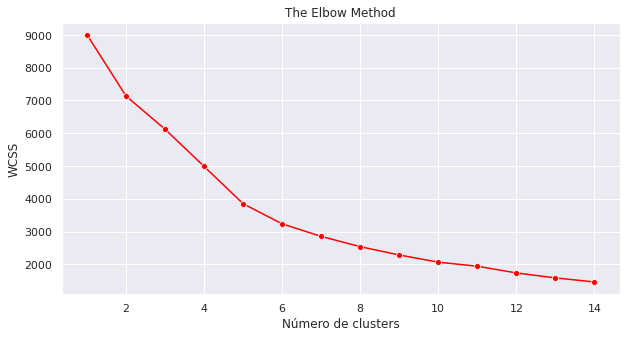

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [83]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [85]:
kmeans2 = kmeans.fit(df_esc)

In [86]:
centroides = kmeans2.cluster_centers_
centroides

array([[ 0.15780258, -0.10775372, -0.00468505, -0.00931282, -0.29287596,
         1.96927621, -0.69072779, -0.59583014, -0.38826278],
       [ 0.00471402,  0.3493342 ,  0.38816725,  0.45042159, -0.29287596,
        -0.50780078, -0.69072779,  1.67833069, -0.38826278],
       [ 0.09012687,  0.27598659,  0.37103369,  0.34464737, -0.29287596,
        -0.50780078,  1.44774833, -0.59583014, -0.38826278],
       [-0.02930808, -0.07670005, -0.03021324, -0.04895193,  3.41441472,
        -0.50780078, -0.69072779, -0.59583014, -0.38826278],
       [-0.17870174,  0.59161013,  0.30937445,  0.22737273, -0.29287596,
        -0.50780078, -0.69072779, -0.59583014,  2.57557523],
       [-0.17698668, -1.29743513, -1.41610879, -1.39188942, -0.29287596,
        -0.32244128,  0.89494498, -0.24000905, -0.30761413]])

In [87]:
escala.inverse_transform(kmeans2.cluster_centers_)

array([[ 5.61855670e-01,  6.47371134e+01,  6.89329897e+01,
         6.75927835e+01, -4.16333634e-17,  1.00000000e+00,
        -4.99600361e-16,  3.33066907e-16,  1.94289029e-16],
       [ 4.85355649e-01,  7.17740586e+01,  7.47196653e+01,
         7.47615063e+01,  0.00000000e+00, -2.77555756e-17,
        -5.55111512e-17,  1.00000000e+00,  1.94289029e-16],
       [ 5.28037383e-01,  7.06448598e+01,  7.44672897e+01,
         7.31121495e+01, -5.55111512e-17, -2.77555756e-17,
         1.00000000e+00,  3.33066907e-16,  1.94289029e-16],
       [ 4.68354430e-01,  6.52151899e+01,  6.85569620e+01,
         6.69746835e+01,  1.00000000e+00, -2.77555756e-17,
         2.22044605e-16,  2.22044605e-16,  1.11022302e-16],
       [ 3.93700787e-01,  7.55039370e+01,  7.35590551e+01,
         7.12834646e+01,  8.32667268e-17, -2.77555756e-17,
        -2.77555756e-16,  2.77555756e-16,  1.00000000e+00],
       [ 3.94557823e-01,  4.64217687e+01,  4.81428571e+01,
         4.60340136e+01,  2.77555756e-17,  7.482993

In [88]:
classificacao2 = kmeans2.labels_
classificacao2

array([3, 1, 4, 0, 4, 1, 3, 4, 1, 5, 4, 1, 1, 2, 4, 4, 0, 2, 5, 5, 2, 5,
       0, 0, 5, 5, 5, 4, 0, 3, 0, 3, 3, 0, 0, 3, 2, 0, 0, 4, 0, 1, 4, 2,
       4, 5, 2, 4, 1, 2, 1, 5, 2, 5, 1, 2, 2, 1, 1, 4, 1, 4, 4, 3, 1, 2,
       2, 5, 0, 2, 2, 5, 0, 2, 0, 2, 5, 1, 2, 5, 0, 5, 5, 0, 5, 2, 2, 1,
       1, 0, 5, 0, 1, 1, 0, 2, 4, 0, 3, 0, 5, 2, 4, 1, 0, 1, 1, 3, 0, 5,
       2, 5, 2, 3, 1, 0, 4, 5, 0, 1, 2, 1, 5, 5, 1, 5, 1, 5, 4, 1, 4, 2,
       0, 1, 4, 2, 3, 0, 5, 2, 0, 1, 1, 0, 0, 0, 0, 4, 4, 3, 2, 2, 0, 1,
       2, 5, 0, 4, 1, 4, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 0, 1, 2, 3, 0, 1,
       5, 0, 1, 1, 1, 5, 4, 2, 2, 2, 0, 4, 1, 0, 0, 0, 4, 2, 2, 5, 5, 3,
       0, 1, 1, 4, 2, 0, 1, 0, 3, 2, 3, 0, 1, 1, 2, 2, 4, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 5, 1, 1, 2, 2, 0, 5, 2, 0, 2, 2, 1, 0, 2, 1, 1,
       1, 2, 5, 2, 5, 1, 5, 1, 1, 0, 1, 0, 5, 1, 3, 4, 0, 1, 3, 5, 1, 1,
       1, 1, 2, 1, 0, 4, 2, 1, 0, 4, 0, 4, 1, 4, 0, 1, 1, 4, 0, 5, 0, 2,
       1, 5, 2, 0, 2, 0, 1, 1, 5, 2, 5, 4, 0, 5, 5,

In [89]:
classificacao2[199]

1

In [90]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,3
1,1
2,4
3,0
4,4
...,...
995,2
996,1
997,5
998,2


In [91]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
0,0,67,67,63,1.0,0.0,0.0,0.0,0.0,3
1,1,40,59,55,0.0,0.0,0.0,1.0,0.0,1
2,0,59,60,50,0.0,0.0,0.0,0.0,1.0,4
3,0,77,78,68,0.0,1.0,0.0,0.0,0.0,0
4,0,78,73,68,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...
995,0,73,70,65,0.0,0.0,1.0,0.0,0.0,2
996,0,85,91,92,0.0,0.0,0.0,1.0,0.0,1
997,1,32,35,41,0.0,0.0,1.0,0.0,0.0,5
998,1,73,74,82,0.0,0.0,1.0,0.0,0.0,2


In [92]:
df4.iloc[125 , :]

genero                   0.0
pontuacao_matematica    62.0
pontuacao_leitura       54.0
pontuacao_escrita       58.0
raca_group A             0.0
raca_group B             0.0
raca_group C             1.0
raca_group D             0.0
raca_group E             0.0
Grupo                    5.0
Name: 125, dtype: float64

In [94]:
df4.loc[df4.pontuacao_matematica >= 76] 

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
3,0,77,78,68,0.0,1.0,0.0,0.0,0.0,0
4,0,78,73,68,0.0,0.0,0.0,0.0,1.0,4
7,0,93,88,84,0.0,0.0,0.0,0.0,1.0,4
10,0,99,83,85,0.0,0.0,0.0,0.0,1.0,4
11,1,80,87,90,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
986,0,78,84,77,0.0,0.0,0.0,0.0,1.0,4
987,0,78,78,74,1.0,0.0,0.0,0.0,0.0,3
991,1,87,93,88,0.0,0.0,1.0,0.0,0.0,2
994,0,86,82,75,0.0,0.0,0.0,0.0,1.0,4


In [95]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,genero,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,Grupo
3,0,77,78,68,0.0,1.0,0.0,0.0,0.0,0
16,0,58,47,42,0.0,1.0,0.0,0.0,0.0,0
22,0,71,69,73,0.0,1.0,0.0,0.0,0.0,0
23,1,44,55,54,0.0,1.0,0.0,0.0,0.0,0
28,1,74,89,89,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
968,1,39,51,48,0.0,1.0,0.0,0.0,0.0,0
969,0,67,57,52,0.0,1.0,0.0,0.0,0.0,0
974,1,59,59,58,0.0,1.0,0.0,0.0,0.0,0
979,1,57,65,68,0.0,1.0,0.0,0.0,0.0,0


In [96]:
grupo0.shape

(194, 10)